In [79]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
basedir = '/home/mhowland/Dropbox/Research/Stanford/Lele/AWS_2016-06_Multi-Height_Time_Series/'
windFile = 'Firewheel_FWL'+str(9)+'_mast_file_tsec_72-months.csv'

In [80]:
def importWindFile(basedir, windFile):
    data = np.loadtxt(basedir+windFile, delimiter=',', skiprows=7)
    return data

In [81]:
print(basedir+windFile)
data = importWindFile(basedir, windFile)

/home/mhowland/Dropbox/Research/Stanford/Lele/AWS_2016-06_Multi-Height_Time_Series/Firewheel_FWL9_mast_file_tsec_72-months.csv


In [82]:
ws = np.zeros((data.shape[0],5))
time = np.linspace(0., 10.*data.shape[0],data.shape[0])
nt = ws.shape[0]
for i  in range(0,5):
    ind = 5*i
    ws[:,i] = data[:,ind]

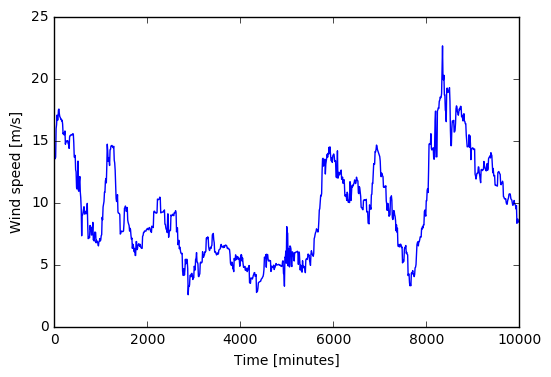

In [83]:
fig = plt.figure(num=None, dpi=200, facecolor='w', edgecolor='k'); ax = plt.gca()
plt.plot(time[1:1000],ws[1:1000,1])
ax.set_xlabel('Time [minutes]'); ax.set_ylabel('Wind speed [m/s]');

In [77]:
# Check the correlation time scale
R = np.zeros(ws.shape)
meanWS = np.mean(ws,axis=0)
up = ws - meanWS
wut = np.std(up,axis=0)
for i in range(0,1000):
    uShift = ws[i:nt,:] - meanWS
    R[i,:] = np.mean(np.multiply(up[0:nt-i],uShift),axis=0) / (np.std(uShift,axis=0)*np.std(up,axis=0))

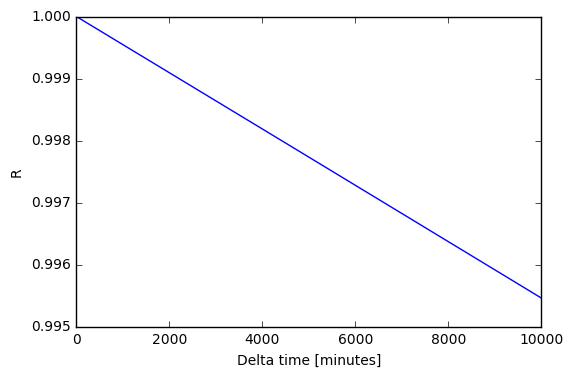

In [78]:
fig = plt.figure(num=None, dpi=200, facecolor='w', edgecolor='k'); ax = plt.gca()
plt.plot(time[1:1000],R[1:1000,0])
ax.set_xlabel('Delta time [minutes]'); ax.set_ylabel('R');